## 🚗 Romania Route-Finding Problem

### 📌 Problem Statement:

This problem involves a **road map of Romania**, represented as a **graph**, where:

- Cities are nodes.
- Roads between cities are edges with weights representing distances (in miles).

The objective is to find a route between two specified cities using different graph search algorithms.

---

### 🎯 Objective:

Find the **optimal path** from `Arad` to `Bucharest`, minimizing the total distance traveled.

---

### 🔍 Graph Description:

- The graph is undirected and weighted.
- Each edge has a positive weight indicating the road distance in miles.
- The initial state is the city `Arad`, and the goal state is `Bucharest`.

---

### ✅ Task:

Apply and evaluate the following search algorithms on the Romania map:

- Breadth-First Search (BFS)
- Depth-First Search (DFS)
- Depth-Limited Search (DLS)
- Iterative Deepening Search (IDS)
- Uniform Cost Search (UCS)
- Greedy Best-First Search
- A* Search
- Weighted A*

For each algorithm, collect and compare the following metrics:

- Completeness
- Optimality
- Time taken to find the path
- Memory usage 

---

### ✨ Additional Considerations:

- For informed searches, use the **Straight-Line Distance (SLD) to Bucharest** as the heuristic.
- Visualization of the final path on the Romania map may be included as an enhancement.



In [203]:
import queue

In [204]:
def create_graph(graph_edges):
    graph = {}
    costs = dict()
    for edge in graph_edges:
        u,v = edge[0], edge[1]
        cost = edge[2]

        if u not in graph:
            graph[u] = []
        if v not in graph:
            graph[v] = []
        graph[u].append(v)
        graph[v].append(u)

        costs[(u, v)] = cost
        costs[(v, u)] = cost  

    return graph,  costs

In [205]:
def bfs(graph, start_node, goal_node, costs):
    q = queue.Queue()
    q.put((start_node, [start_node], 0 ))
    visited = set()
    order = []
    while not q.empty():

        node, path, cost_so_far = q.get()
        order.append(node)

        if node == goal_node:
            return path, cost_so_far, order
        
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    q.put((neighbor, path + [neighbor], cost_so_far + costs[(node, neighbor)]))
                    
    return None


def dfs(graph, start_node, goal_node, costs):
    stack = [(start_node, [start_node], 0)]
    visited = set()

    order = []

    while len(stack) > 0:
        node, path, cost_so_far = stack.pop()
        order.append(node)
        # visited.remove(node) #######

        if node == goal_node:
            return path, cost_so_far, order

        # if node not in visited:
            # visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor], cost_so_far + costs[(node, neighbor)]))
    return None


def depth_limited(graph, start_node, goal_node, costs, limit):
    stack = [(start_node, [start_node], 0)]
    order = []

    while len(stack) > 0:
        node, path, cost_so_far = stack.pop()
        order.append(node)

        if node == goal_node:
            return path, cost_so_far, order

        if len(path) <= limit:
            for neighbor in graph[node]:
                stack.append((neighbor, path + [neighbor], cost_so_far + costs[(node, neighbor)]))
    return None,None,order

def iterative_deepening(graph, start_node, goal_node, costs):
    depth = 0
    total_order = []
    while True:
        path, cost, order = depth_limited(graph, start_node, goal_node, costs, depth)
        if path is not None:
            return path, cost, total_order + order
        total_order += order
        depth += 1
        # print("depth : ", depth)
        if depth > len(graph):
            break
    return None

def ucs(graph, start_node, goal_node, costs):
    q = queue.PriorityQueue()
    q.put((0, start_node, [start_node]))
    visited = set()
    order = []
    while not q.empty():
        cost_so_far, node, path = q.get()
        order.append(node)

        if node == goal_node:
            return path, cost_so_far, order

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    q.put((cost_so_far + costs[(node, neighbor)], neighbor, path + [neighbor]))
    return None

def greedy_best_first(graph, start_node, goal_node, costs, h):
    
    curr_node = start_node
    cost_so_far = 0
    path = [start_node]
    
    
    
    while True:
        next_node = None
        curr_estimate = None 
        
        if curr_node == goal_node:
            return path, cost_so_far, path
    
        for neighbor in graph[curr_node]:
            
            if curr_estimate is None or h[neighbor] < curr_estimate:
                next_node = neighbor
                curr_estimate = h[neighbor]

            if next_node is None:
                return None     ########what to do here?
            
            path.append(next_node)
            cost_so_far += costs[(curr_node, next_node)]
            
            if next_node == goal_node:
                return path, cost_so_far, path
        
            
        curr_node = next_node
        

        

    return None

def a_star(graph, start_node, goal_node, costs, h):
    q = queue.PriorityQueue()
    q.put((0, start_node, [start_node], 0))
    order = []
    while not q.empty():
        f, node, path, g = q.get()
        order.append(node)

        if node == goal_node:
            return path, g , order
    
        for neighbor in graph[node]:
            f = g + costs[(node, neighbor)] + h[neighbor]
            q.put((f, neighbor, path + [neighbor], g + costs[(node, neighbor)]))
    return None

def weighted_a_star(graph, start_node, goal_node, costs, h, w):
    q = queue.PriorityQueue()
    q.put((0, start_node, [start_node], 0))
    order = []
    while not q.empty():
        f, node, path, g = q.get()
        order.append(node)

        if node == goal_node:
            return path, f, order

        for neighbor in graph[node]:
            f = g + costs[(node, neighbor)] + w * h[neighbor]
            q.put((f, neighbor, path + [neighbor], g + costs[(node, neighbor)]))
    return None

In [206]:
graph_edges = [
    ('Arad', 'Zerind', 75),
    ('Arad', 'Timisoara', 118),
    ('Arad', 'Sibiu', 140), 
    ('Zerind', 'Oradea', 71), 
    ('Oradea', 'Sibiu', 151), 
    ('Timisoara', 'Lugoj', 111),
    ('Lugoj', 'Mehadia', 70),
    ('Mehadia', 'Drobeta', 75),
    ('Drobeta', 'Craiova', 120),
    ('Craiova', 'Pitesti', 138),
    ('Craiova', 'Rimnicu Vilcea', 146),
    ('Rimnicu Vilcea', 'Sibiu', 80),
    ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Sibiu', 'Fagaras', 99),
    ('Fagaras', 'Bucharest', 211),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urziceni', 85),
    ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86),
    ('Urziceni', 'Vaslui', 142),
    ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87),
]

start_node = 'Arad'
goal_node = 'Bucharest'

heuristics = {
    'Arad': 366,
    'Mehadia': 241,
    'Bucharest': 0,
    'Neamt': 234,
    'Craiova': 160,
    'Oradea': 380,
    'Drobeta': 242,
    'Pitesti': 100,
    'Eforie': 161,
    'Rimnicu Vilcea': 193,
    'Fagaras': 176,
    'Sibiu': 253,
    'Giurgiu': 77,
    'Timisoara': 329,
    'Hirsova': 151,
    'Urziceni': 80,
    'Iasi': 226,
    'Vaslui': 199,
    'Lugoj': 244,
    'Zerind': 374
}
graph, costs = create_graph(graph_edges)


# path, cost, order = iterative_deepening(graph, start_node, goal_node, costs)
# print("Path:", path)
# print("Cost:", cost)
# print("Order of nodes visited:", order)


# print(create_reports("Iterative Deepening",graph, start_node, goal_node, costs, heuristics))







In [207]:

import time
import tracemalloc
import concurrent.futures
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def check_optimality(path, cost):
    optimal_path = ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
    optimal_cost = 418 
    if path == optimal_path and cost == optimal_cost:
        return True
    else:
        return False

def _run_algorithm( algo_name, 
                    graph,
                    start_node,
                    goal_node,
                    costs,
                    heuristics=None,
                    w=1.5,
                    limit=5):
    
    if algo_name == 'BFS':
        return bfs(graph, start_node, goal_node, costs)
    elif algo_name == 'DFS':
        return dfs(graph, start_node, goal_node, costs)
    elif algo_name == 'Depth Limited':
        return depth_limited(graph, start_node, goal_node, costs, limit)
    elif algo_name == 'Iterative Deepening':
        return iterative_deepening(graph, start_node, goal_node, costs)
    elif algo_name == 'UCS':
        return ucs(graph, start_node, goal_node, costs)
    elif algo_name == 'Greedy Best First':
        return greedy_best_first(graph, start_node, goal_node, costs, heuristics)
    elif algo_name == 'A*':
        return a_star(graph, start_node, goal_node, costs, heuristics)
    elif algo_name == 'Weighted A*':
        return weighted_a_star(graph, start_node, goal_node, costs, heuristics, w)
    else:
        raise ValueError(f"Unknown algorithm: {algo_name}")
    
def create_reports( algo_name,
                    graph,
                    start_node,
                    goal_node,
                    costs,
                    heuristics=None,
                    w:float = 1.5,
                    limit:int=5
                    ):
    
    TIMEOUT = 10 * 1000 * 1000 * 1000  # 10 seconds in nanosec
    
    start_time = time.perf_counter_ns()
    memory_used = 0  
    path = None
    cost = 0
    order = None
    
    tracemalloc.start()
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future = executor.submit(
                                _run_algorithm,
                                algo_name,
                                graph,
                                start_node,
                                goal_node,
                                costs,
                                heuristics,
                                w,
                                limit
                            )
        try:
            path, cost, order = future.result(timeout=TIMEOUT / 1e9)  
        except concurrent.futures.TimeoutError:
            print(f"Algorithm {algo_name} timed out after {TIMEOUT / 1e9} seconds.")
            current_memory, peak_memory = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            memory_used = peak_memory # bytes
            
            return {
                'algorithm': algo_name,
                'path': None,
                'cost': None,
                'order of exploration': None,
                'time': TIMEOUT,
                'memory': memory_used,
                'complete': False,
                'optimal': False
            }
        except Exception as e:
            print(f"An error occurred while running the algorithm {algo_name}: {e}")
            tracemalloc.stop()
            return {
                'algorithm': algo_name,
                'path': None,
                'cost': None,
                'order of exploration': None,
                'time': 0,
                'memory': 0,
                'complete': False,
                'optimal': False
            }
  
    end_time = time.perf_counter_ns()
    
    current_memory, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    memory_used = peak_memory # bytes
    
    time_passed = (end_time - start_time)   # nanosec
    return {
        'algorithm': algo_name,
        'path': path,
        'cost': cost,
        'order of exploration': order,
        'time': time_passed,
        'memory': memory_used,
        'complete': True,  
        'optimal': check_optimality(path,cost)   
    }
    



def create_comparison_charts_and_save(comparison_reports):
    algorithms = [report['algorithm'] for report in comparison_reports]
    times = [report['time']  for report in comparison_reports]  
    memories = [report['memory'] for report in comparison_reports]  
    costs = [report['cost'] for report in comparison_reports]
    completeness = [report['complete'] for report in comparison_reports]

    # Time chart
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, times, color='skyblue')
    plt.ylabel('Time (ns)')
    plt.title('Execution Time Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("time_comparison.png")
    plt.close()

    # Memory chart
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, memories, color='salmon')
    plt.ylabel('Peak Memory (B)')
    plt.title('Memory Usage Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("memory_comparison.png")
    plt.close()

    # Cost chart
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, costs, color='mediumseagreen')
    plt.ylabel('Path Cost')
    plt.title('Path Cost Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("cost_comparison.png")
    plt.close()

    # Completeness chart
    plt.figure(figsize=(10, 6))
    completeness_numeric = [1 if c else 0 for c in completeness]
    plt.bar(algorithms, completeness_numeric, color='plum')
    plt.ylabel('Complete (1 = Yes, 0 = No)')
    plt.title('Completeness Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("completeness_comparison.png")
    plt.close()



def create_performance_heatmap(comparison_reports):
    # Step 1: Convert to DataFrame
    df = pd.DataFrame(comparison_reports)

    # Step 2: Convert nanoseconds → seconds, bytes → nodes (optional scaling), etc.
    df['Time (s)'] = df['time'] / 1e9
    df['Memory (KB)'] = df['memory'] / 1024
    df['Path Cost'] = df['cost']
    df['Exploration (%)'] = df['order of exploration'].apply(lambda x: len(x))
    df['Algorithm'] = df['algorithm']

    # Step 3: Select metrics
    metrics_to_include = ['Time (s)', 'Memory (KB)', 'Exploration (%)', 'Path Cost']
    algorithms = df['Algorithm']
    
    norm_matrix = np.zeros((len(algorithms), len(metrics_to_include)))

    for i, metric in enumerate(metrics_to_include):
        values = np.array(df[metric], dtype=float)

        if np.isnan(values).any():
            max_val = np.nanmax(values)
            values = np.nan_to_num(values, nan=max_val)

        if metric == 'Path Cost':
            min_val = np.min(values[values > 0])
            norm_values = np.zeros_like(values)
            mask = values > 0
            norm_values[mask] = min_val / values[mask]
        else:
            max_val = np.max(values)
            norm_values = values / max_val if max_val > 0 else values
        
        norm_matrix[:, i] = norm_values

    # Step 4: Plot heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(norm_matrix, annot=True, fmt='.2f', cmap='OrRd',
                     xticklabels=metrics_to_include, yticklabels=algorithms)

    plt.title('Search Algorithm Performance Heatmap (Normalized)', fontsize=16)
    plt.tight_layout()
    plt.savefig("performance_heatmap.png")
    plt.show()



In [208]:
def run_all_algos():
    comparison_reports = {}
    algos = ["BFS", "DFS", 'Depth Limited', 'Iterative Deepening', 'UCS', 'Greedy Best First', 'A*', 'Weighted A*' ]
    
    for algo in algos:
        print(f"algo :  {algo}")
        report = create_reports(algo_name=algo, graph=graph, start_node=start_node, goal_node=goal_node, costs=costs, heuristics=heuristics, w=1.5)
        comparison_reports[report['algorithm']] = report
    
    # for algo, report in comparison_info.items():
        # print(report)
        
    create_comparison_charts_and_save(list(comparison_reports.values()))
    create_performance_heatmap(list(comparison_reports.values()))


algo :  BFS
algo :  DFS
algo :  Depth Limited
algo :  Iterative Deepening
algo :  UCS
algo :  Greedy Best First
algo :  A*
algo :  Weighted A*


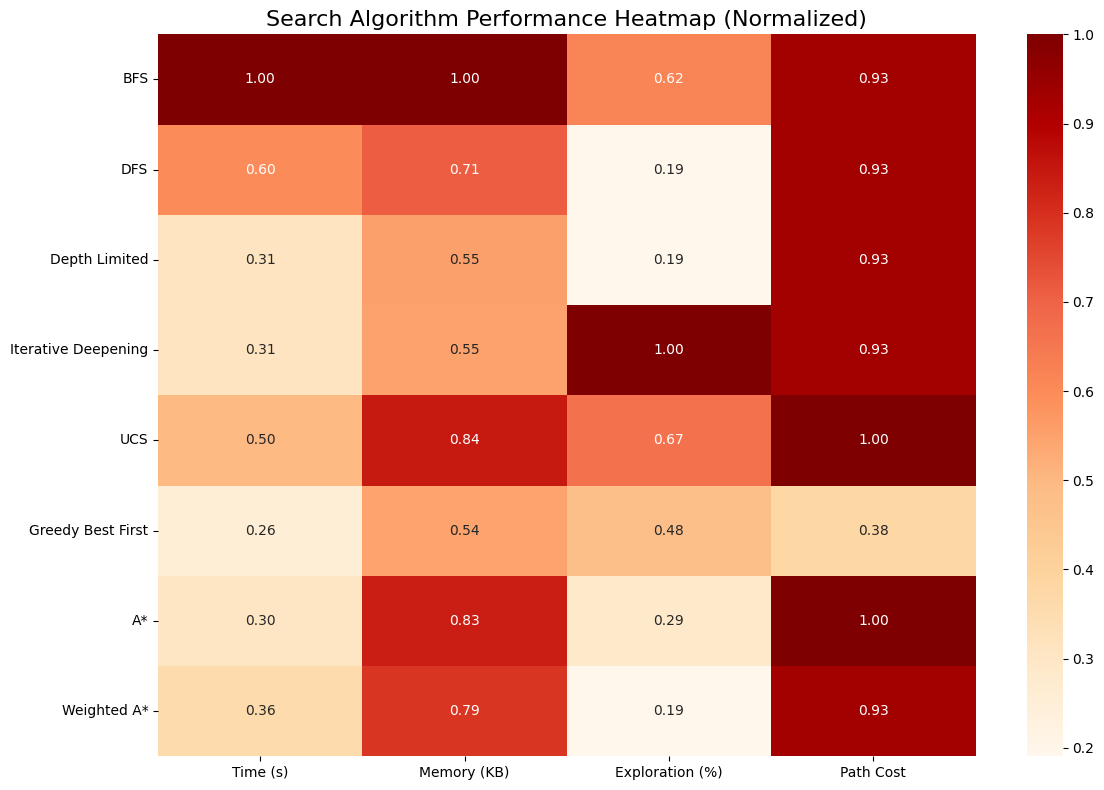

In [209]:
run_all_algos()

##  Search Algorithm Performance Heatmap (Normalized)

This heatmap visualizes and compares the performance of various search algorithms using **normalized metrics**, allowing for fair cross-metric evaluation. The values range from **0 (worst)** to **1 (best)** based on how well an algorithm performs in:

- **Time (s)**: Execution time (lower is better)
- **Memory (KB)**: Memory usage (lower is better)
- **Exploration (%)**: Fraction of total nodes explored (lower is better)
- **Path Cost**: Final cost of the found path (lower is better)

---

###  Key Insights

- **BFS (Breadth-First Search)**  
  - Shows the highest (worst) values across all metrics, indicating **poor performance**, especially in memory and exploration.

- **DFS & Depth Limited**  
  - Score low in memory and time, suggesting they are **fast and lightweight**, but have **high path cost**, indicating **suboptimal results**.

- **Iterative Deepening**  
  - Balanced performance across metrics. Time and memory efficiency are decent, but exploration cost is high due to repeated searches.

- **UCS (Uniform Cost Search)**  
  - **Best overall performer** with high scores across all metrics. It finds **optimal paths** efficiently with a reasonable trade-off in resources.

- **Greedy Best-First Search**  
  - Performs well in time and memory but has a **poor path cost**, reflecting its tendency to find fast but **suboptimal solutions**.

- **A\*** and **Weighted A\***  
  - A\* performs very well in path cost and overall balance.  
  - Weighted A\* offers faster solutions than A\*, at the **cost of slightly less optimal paths**.

---


The heatmap clearly highlights the **trade-offs between speed, memory usage, and path quality**.  
- If optimality is key, **A\*** or **UCS** are best choices.  
- For faster, low-memory needs where path cost is secondary, **DFS**, **Greedy Best First**, or **Weighted A\*** may be preferred.
